In [2]:
# data analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [3]:
data=pd.read_csv(r'C:\Users\IRINNISAR\Downloads\iris-flower-dataset\IRIS.csv')

In [4]:
display(data.info(),data.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


None

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [5]:
data['species'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: species, dtype: int64

In [6]:
#convert all non-numeric to number
categorical = ['species']
for var in categorical:
    le=preprocessing.LabelEncoder()
    data[var]=le.fit_transform(data[var].astype('str'))
data.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species           int32
dtype: object

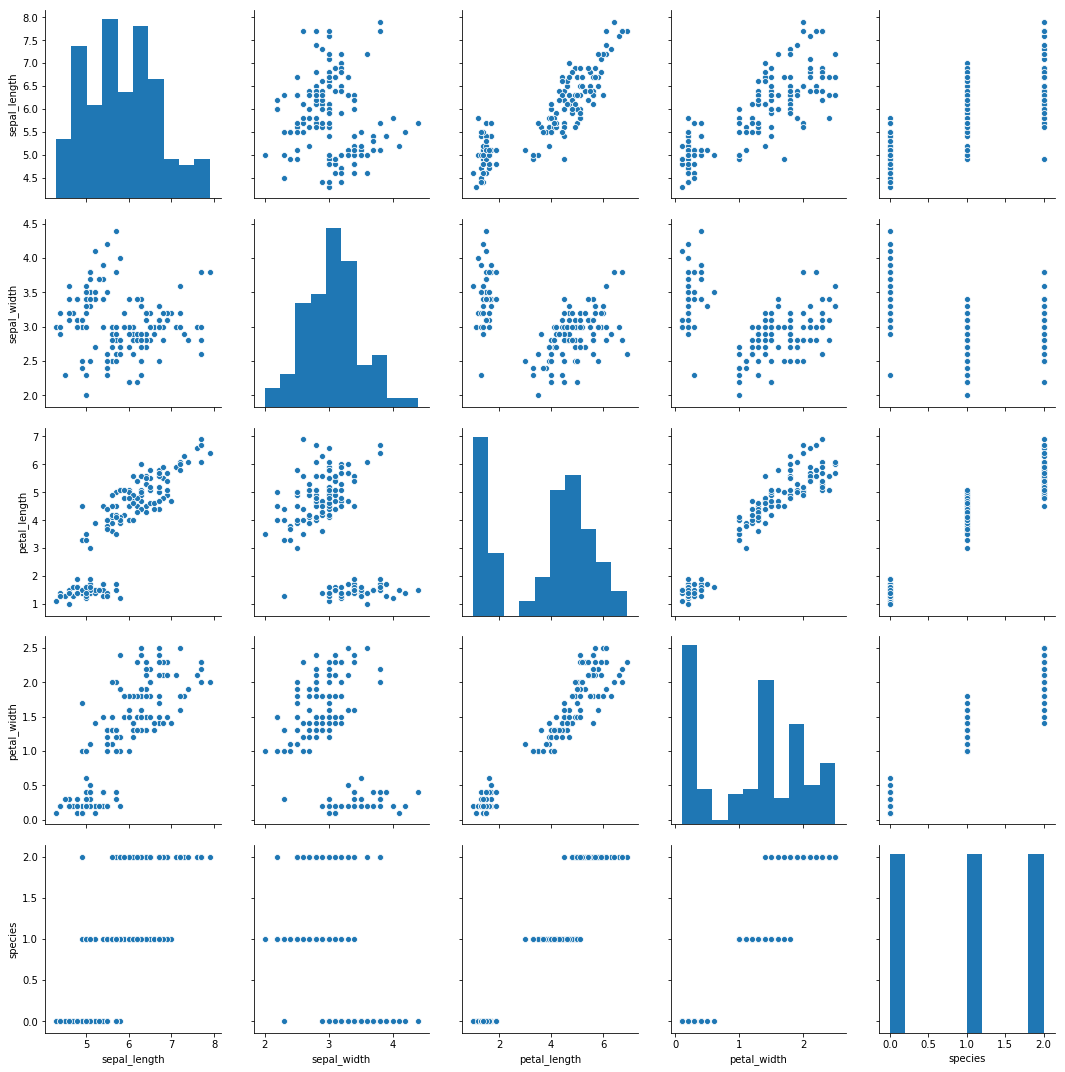

In [7]:
cols = ['sepal_length','sepal_width','petal_length','petal_width','species']
sns.pairplot(data[cols],height=3.0)

In [8]:
from sklearn.model_selection import train_test_split as tts

X=data.drop('species',axis=1)
y=data['species']

X_train,X_test,y_train,y_test=tts(X,y,test_size=0.2,random_state=0)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [9]:
from sklearn.linear_model import LogisticRegression

#Model use logisticregression because has linear relation
model=LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=120)

#fiting the model
model.fit(X_train, y_train)

#prediction
y_pred = model.predict(X_test)

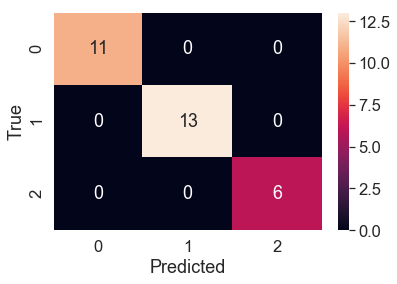

In [10]:
from sklearn.metrics import confusion_matrix
sns.set(font_scale=1.5)
confusion = confusion_matrix(y_test,y_pred)
sns.heatmap(confusion, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [11]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)*100

100.0